First, do the necessary imports:

In [1]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
%matplotlib inline

Part I) Rotation around X-axis

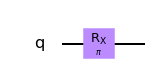

In [2]:
qc = QuantumCircuit(1)
qc.rx(np.pi, 0)
qc.draw("mpl")

In [3]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=1)

array([[ 6.123234e-17+0.j, -6.123234e-17-1.j],
       [ 6.123234e-17-1.j,  6.123234e-17+0.j]])

Part II) Toffoli gate

In [4]:
def build_toffoli_init():
    circ = QuantumCircuit(3)
    # start init
    circ.h(0) 
    circ.h(1) 
    theta = Parameter('theta')
    circ.rx(theta, 2)
    circ.barrier()
    # end of init
    circ.h(2)
    circ.cx(1, 2)
    circ.tdg(2)
    circ.cx(0, 2)
    circ.t(2)
    circ.cx(1, 2)
    circ.tdg(2)
    circ.cx(0, 2)
    circ.tdg(1)
    circ.t(2)
    circ.cx(0, 1)
    circ.h(2)
    circ.tdg(1)
    circ.cx(0, 1)
    circ.t(0)
    circ.s(1)
    circ.measure_all()
    circs = [circ.bind_parameters({theta: theta_val}) for theta_val in [0, np.pi]]
    return circs

In [5]:
circs = build_toffoli_init()

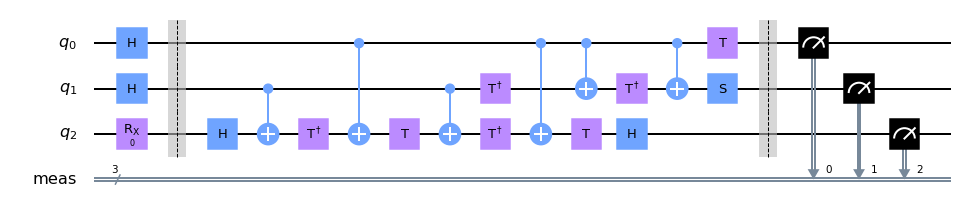

In [6]:
circs[0].draw('mpl')

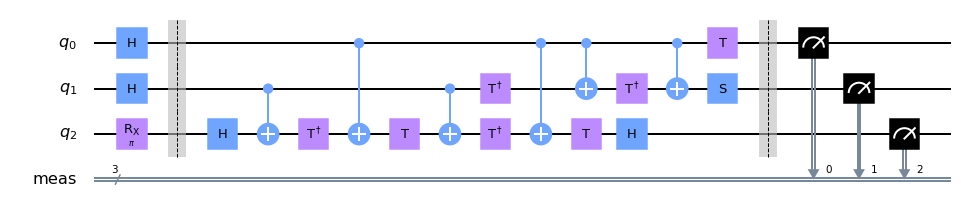

In [7]:
circs[1].draw('mpl')

In [8]:
from qiskit.visualization import plot_histogram

In [10]:
for circ in circs:
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circ, simulator, shots=900000).result()
    counts = result.get_counts(circ)
    print(counts)
    plot_histogram(counts)

{'000': 224739, '001': 224827, '010': 225830, '111': 224604}
{'011': 224876, '100': 224308, '101': 225904, '110': 224912}


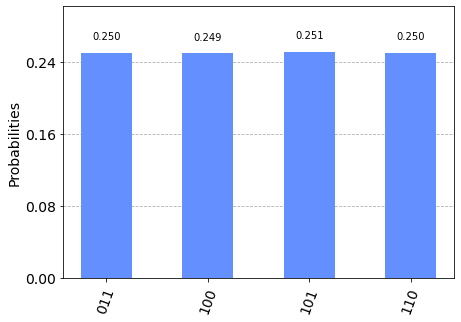

In [11]:
plot_histogram(counts)